In [150]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import os
import math
from PIL import Image


In [27]:
image_path = '/Users/kailashkumar/Downloads/week4/kai_small_dataset' # small data
#image_path = '/Users/kailashkumar/Downloads/week4/easy-500/images' #big data

labels_limit = 5

In [28]:
labels_df = pd.read_parquet("/Users/kailashkumar/Downloads/week4/easy-500/labels.parquet")
labels_df.head(), labels_df['image_id'].value_counts(), labels_df['class'].value_counts()

(   image_id    x    y  orientation  radius  class
 0         0  269  450     0.000000      17      0
 1         0  533  299     0.663225      45      1
 2         0  539  427     0.610865      46      1
 3         0  365  148     0.488692      45      1
 4         0  472  136     2.426008      40      1,
 image_id
 0      23
 329    23
 342    23
 341    23
 340    23
        ..
 161    23
 160    23
 159    23
 158    23
 499    23
 Name: count, Length: 500, dtype: int64,
 class
 1    5500
 2    5500
 0     500
 Name: count, dtype: int64)

In [120]:
small_labels_df = labels_df[:23*labels_limit]
small_labels_df[small_labels_df['image_id']==0]

,image_id,x,y,orientation,radius,class
0,0,269,450,0.000000,17,0
1,0,533,299,0.663225,45,1
2,0,539,427,0.610865,46,1
3,0,365,148,0.488692,45,1
4,0,472,136,2.426008,40,1
5,0,846,448,4.660029,41,1
6,0,613,248,6.003933,41,1
7,0,287,214,2.391101,48,1
8,0,657,387,5.393067,44,1
9,0,752,311,2.792527,41,1


In [3]:
labels_df[labels_df['image_id']==56]

,image_id,x,y,orientation,radius,class
1288,56,164,213,0.000000,16,0
1289,56,462,451,3.612832,40,1
1290,56,218,151,0.314159,38,1
1291,56,400,350,4.258603,47,1
1292,56,313,249,2.007129,49,1
1293,56,889,437,1.937315,44,1
1294,56,98,313,1.151917,42,1
1295,56,185,341,6.073746,48,1
1296,56,742,305,3.577925,49,1
1297,56,787,128,1.727876,46,1


In [4]:
labels_df.columns

Index(['image_id', 'x', 'y', 'orientation', 'radius', 'class'], dtype='object')

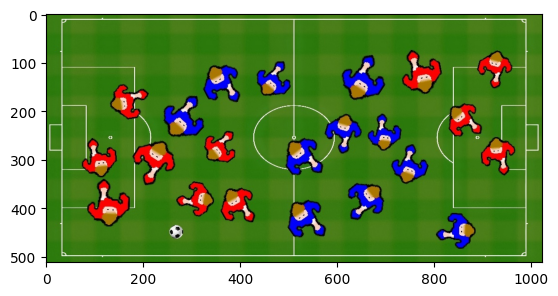

In [5]:
image = img.imread("/Users/kailashkumar/Downloads/week4/easy-500/images/0.jpg")
plt.imshow(image);


In [6]:
list = labels_df.values.tolist()
image_1_labels = list[:23]

labels_list =[]
for i in range(500):
    number = 23*i
    labels_list.append(list[number:number+23])
labels_list[99] # Printing 23 values for each image

[[99.0, 931.0, 286.0, 0.0, 17.0, 0.0],
 [99.0, 158.0, 151.0, 1.0995574287564276, 45.0, 1.0],
 [99.0, 242.0, 195.0, 4.4331363000655974, 47.0, 1.0],
 [99.0, 95.0, 378.0, 0.12217304763960307, 41.0, 1.0],
 [99.0, 464.0, 52.0, 0.5759586531581288, 38.0, 1.0],
 [99.0, 399.0, 129.0, 3.2288591161895095, 45.0, 1.0],
 [99.0, 215.0, 309.0, 1.7976891295541595, 44.0, 1.0],
 [99.0, 97.0, 212.0, 3.5779249665883754, 40.0, 1.0],
 [99.0, 580.0, 282.0, 0.7330382858376184, 37.0, 1.0],
 [99.0, 640.0, 388.0, 4.136430327226561, 39.0, 1.0],
 [99.0, 708.0, 93.0, 5.445427266222308, 42.0, 1.0],
 [99.0, 215.0, 415.0, 5.585053606381854, 46.0, 1.0],
 [99.0, 352.0, 297.0, 1.1344640137963142, 43.0, 2.0],
 [99.0, 838.0, 341.0, 5.113814708343385, 37.0, 2.0],
 [99.0, 863.0, 244.0, 4.084070449666731, 43.0, 2.0],
 [99.0, 285.0, 88.0, 2.2863813201125716, 47.0, 2.0],
 [99.0, 658.0, 183.0, 3.2986722862692828, 42.0, 2.0],
 [99.0, 563.0, 139.0, 6.265732014659643, 46.0, 2.0],
 [99.0, 822.0, 443.0, 1.2740903539558606, 41.0, 2.0],

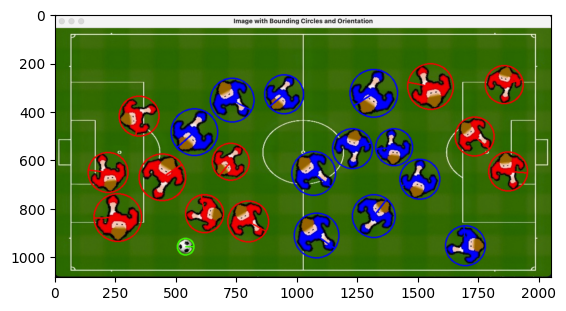

In [7]:
# Load the image (replace 'image_path' with the actual path to your image)
image_path = '/Users/kailashkumar/Downloads/week4/easy-500/images/0.jpg'
image = cv2.imread(image_path)

# Define a dictionary to store the labels for each class
class_labels = {
    0: [],  # Ball
    1: [],  # Team 1
    2: []   # Team 2
}

# Separate the data into different classes
for id, x, y, orientation, radius, class_id in image_1_labels:
    class_labels[class_id].append((x, y, orientation, radius))

# Define colors for each class
colors = {
    0: (0, 255, 0),   # Green for the ball
    1: (255, 0, 0),   # Blue for Team 1
    2: (0, 0, 255)    # Red for Team 2
}

# Draw bounding circles and orientation lines
for class_id, labels in class_labels.items():
    color = colors[class_id]
    for x, y, orientation, radius in labels:
        # Draw the bounding circle
        cv2.circle(image, (int(x), int(y)), int(radius), color, 2)

        # Draw a line to indicate the orientation
        cv2.line(image, (int(x), int(y)), (int(x + radius * np.cos(orientation)), int(y + radius * np.sin(orientation))), color, 2)

# Display the image with bounding circles and orientation lines
"""cv2.imshow('Image with Bounding Circles and Orientation', image)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

plt.imshow(img.imread('/Users/kailashkumar/Downloads/week4/kai_files/Screenshot 2024-03-25 at 12.45.21 PM.png'));

In [10]:
S = 7
B = 2
num_classes = 3

target = torch.zeros((S, S, B, 6 + num_classes))

print("Target tensor shape:", target.shape)
target

Target tensor shape: torch.Size([7, 7, 2, 9])


tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., 0.,

In [187]:
# Define the parameters
img_size = 448
grid_size = 7
num_classes = 3
cell_size = img_size // grid_size


# Load the labels
labels = small_labels_df
#print(len(labels)) # 115

# Create output arrays
X = np.zeros((len(labels), img_size, img_size, 3), dtype=np.float32)
y_true = np.zeros((len(labels), grid_size, grid_size, 5 + num_classes), dtype=np.float32)
print(y_true.shape)

# Preprocess the images and labels
for i, row in labels.iterrows():
    image_id = row['image_id']
    img_path = f"{int(image_id)}.jpg"
    
    # Load image with cv2 and convert to RGB
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate the aspect ratio, note that the y and x is swapped in order
    aspect_ratio = image.shape[1]/ img_size, image.shape[0] / img_size
    print(aspect_ratio)

    # Resize image
    image = cv2.resize(image, img_size, interpolation=cv2.INTER_LINEAR)

    image_debug = image

    # Normalize image
    image = image / 255.0
    image = np.transpose(image, (2, 0, 1))  # From HWC to CHW
    image = torch.tensor(image, dtype=torch.float)

    # Initialize the target tensor
    target = torch.zeros((self.S, self.S, self.B, (self.property_count + self.C)))
    print(target.shape)

    print(self.img_labels.iloc[idx])

    rand_num = 45
    # Preprocess the labels
    x, y, orientation, radius, class_id = row[['x', 'y', 'orientation', 'radius', 'class']].values
    if i == rand_num:
        print(f"the x, y, orientation, radius, class_id values{x, y, orientation, radius, class_id}") # 269.0 450.0 0.0 17.0 0.0

    # Convert normalized coordinates to grid cell indices
    cell_x = int(x * grid_size)
    cell_y = int(y * grid_size)
    if i == rand_num:
        print(cell_x)
        print(cell_y)

    # Ensure cell indices are within the valid range
    cell_x = max(0, min(cell_x, grid_size - 1))
    cell_y = max(0, min(cell_y, grid_size - 1))
    if i == rand_num:
        print(cell_x)
        print(cell_y)

    # Calculate the normalized bounding box coordinates
    bounding_box = [x / img_size, y / img_size, radius / img_size, orientation, 1]
    if i == rand_num:
        print(bounding_box)
    
    # One-hot encode the class label
    class_label = np.eye(num_classes)[int(class_id)]
    if i == rand_num:
        print(class_label)
    
    # Add the bounding box and class label to the output tensor
    y_true[i, cell_y, cell_x, :5] = bounding_box
    if i == rand_num:
        print(y_true.shape)
    y_true[i, cell_y, cell_x, 5:] = class_label
    if i == rand_num:
        print(y_true.shape)

# Reshape the output tensor for the YOLOv1 architecture
y_true = y_true.reshape(len(labels), grid_size, grid_size, (5 + num_classes))
print(y_true)


labeldata = self.img_labels[self.img_labels['image_id'] == idx]

        img_path = f"{self.img_dir}/{int(self.img_labels.iloc[idx]['image_id'])}.jpg"

        # Load image with cv2 and convert to RGB
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Calculate the aspect ratio, note that the y and x is swapped in order
        aspect_ratio = image.shape[1]/ img_size, image.shape[0] / img_size
        print(aspect_ratio)

        # Resize image
        image = cv2.resize(image, img_size, interpolation=cv2.INTER_LINEAR)

        image_debug = image

        # Normalize image
        image = image / 255.0
        image = np.transpose(image, (2, 0, 1))  # From HWC to CHW
        image = torch.tensor(image, dtype=torch.float)

        # Initialize the target tensor
        target = torch.zeros((self.S, self.S, self.B, (self.property_count + self.C)))
        print(target.shape)

        print(self.img_labels.iloc[idx])

#Loop through objects (this part may need to be adjusted based on your data structure)
        for , row in label_data.iterrows():
            # Normalize x, y, and radius
            x, y, radius = row['x'] / (image_size * aspect_ratio[0]), row['y'] / (img_size * aspect_ratio[1]), row['radius']
            #print(f"X: {x} y: {y}, radius: {radius}")

(115, 7, 7, 8)
the x, y, orientation, radius, class_id values(509.0, 298.0, 1.5184364492350666, 41.0, 2.0)
3563
2086
6
6
[1.1361607142857142, 0.6651785714285714, 0.09151785714285714, 1.5184364492350666, 1]
[0. 0. 1.]
(115, 7, 7, 8)
(115, 7, 7, 8)
[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0

In [108]:
print(f"lenght of X is {len(X)}, with shape of {X[0].shape}")
print(f"length of y_true is {len(y_true)}, with each shape of {y_true[0].shape}")
y_true[1][2][2]

lenght of X is 115, with shape of (448, 448, 3)
length of y_true is 115, with each shape of (3, 3, 16)


array([1.1897322 , 0.66741073, 0.10044643, 0.6632251 , 1.        ,
       0.        , 1.        , 0.        , 1.1897322 , 0.66741073,
       0.10044643, 0.6632251 , 1.        , 0.        , 1.        ,
       0.        ], dtype=float32)

In [156]:
# Define parameters
img_size = 448
num_classes = 3

# Function to convert dataframe labels to YOLO format
def convert_labels_to_yolo(df_row):
    # Extract relevant information from the dataframe row
    x_center = df_row['x'] / img_size
    y_center = df_row['y'] / img_size
    radius = df_row['radius'] / img_size
    orientation = df_row['orientation']
    class_id = df_row['class']
    
    # Calculate the coordinates of the circle
    circle_center = (int(x_center * img_size), int(y_center * img_size))
    circle_radius = int(radius * img_size)

    return f"{class_id} {circle_center[0]} {circle_center[1]} {circle_radius} {orientation}"

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_size, img_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0  # Normalize pixel values to range [0, 1]
    return image

# Path to the folder containing images
images_folder = 'kai_small_dataset'

# Read dataframe
labels_df = small_labels_df

# Create YOLO labels for each image
for image_name in os.listdir(images_folder):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(images_folder, image_name)
        print(image_path)
        image_id = image_name.split('.')[0]
        print(image_id)
        image_labels_df = labels_df[labels_df['image_id'] == int(image_id)]
       
        # Preprocess image
        image = preprocess_image(image_path)
        print(image.shape)
        
        # Create YOLO labels
        yolo_labels = ""
        for _, row in image_labels_df.iterrows():
            yolo_labels += convert_labels_to_yolo(row) + "\n"
        
        # Save preprocessed image and labels
        np.save(f"{image_id}_image.npy", image)
        with open(f"{image_id}_labels.txt", "w") as f:
            f.write(yolo_labels)


kai_small_dataset/4.jpg
4
(448, 448, 3)
kai_small_dataset/2.jpg
2
(448, 448, 3)
kai_small_dataset/3.jpg
3
(448, 448, 3)
kai_small_dataset/1.jpg
1
(448, 448, 3)
kai_small_dataset/0.jpg
0
(448, 448, 3)


In [138]:
labeldata = self.img_labels[self.img_labels['image_id'] == idx]

        img_path = f"{self.img_dir}/{int(self.img_labels.iloc[idx]['image_id'])}.jpg"

        # Load image with cv2 and convert to RGB
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Calculate the aspect ratio, note that the y and x is swapped in order
        aspect_ratio = image.shape[1]/ self.target_size[1], image.shape[0] / self.target_size[0]
        print(aspect_ratio)

        # Resize image
        image = cv2.resize(image, self.target_size, interpolation=cv2.INTER_LINEAR)

        image_debug = image

        # Normalize image
        image = image / 255.0
        image = np.transpose(image, (2, 0, 1))  # From HWC to CHW
        image = torch.tensor(image, dtype=torch.float)

        # Initialize the target tensor
        target = torch.zeros((self.S, self.S, self.B, (self.property_count + self.C)))
        print(target.shape)

        print(self.img_labels.iloc[idx])

Loop through objects (this part may need to be adjusted based on your data structure)
        for , row in label_data.iterrows():
            # Normalize x, y, and radius
            x, y, radius = row['x'] / (self.target_size[0] * aspect_ratio[0]), row['y'] / (self.target_size[1] * aspect_ratio[1]), row['radius']
            #print(f"X: {x} y: {y}, radius: {radius}")

'0.0 269 450 17 0.0\n1.0 533 299 45 0.6632251157578453\n1.0 539 427 46 0.6108652381980153\n1.0 365 148 45 0.4886921905584123\n1.0 472 136 40 2.426007660272118\n1.0 846 448 41 4.6600291028248595\n1.0 613 248 41 6.003932626860494\n1.0 287 214 48 2.3911010752322315\n1.0 657 387 44 5.3930673886624785\n1.0 752 311 41 2.792526803190927\n1.0 657 134 49 2.5656340004316642\n1.0 699 245 38 3.01941960595019\n2.0 308 382 39 4.537856055185257\n2.0 926 116 39 6.021385919380437\n2.0 398 398 42 0.5061454830783556\n2.0 774 120 47 3.3335788713091694\n2.0 221 307 48 5.724679946541401\n2.0 129 390 49 3.1066860685499065\n2.0 362 275 38 2.234021442552742\n2.0 173 181 41 1.7278759594743862\n2.0 109 297 41 3.246312408709453\n2.0 933 295 40 0.08726646259971647\n2.0 865 223 40 0.6981317007977318\n'

In [180]:
# Parameters
img_size = 448
S = 3
B = 2
num_classes = 3

# Path to the folder containing images
images_folder = 'kai_small_dataset'

# Load your dataframe
df = small_labels_df # Replace with your CSV file

# Function to preprocess a single image
def preprocess_image(image_path):
    """Resize and normalize the image."""
    image = Image.open(image_path).convert('RGB')
    image = image.resize((img_size, img_size))
    image = np.array(image, dtype=np.float32) / 255.0
    image = image.transpose((2, 0, 1))  # To match PyTorch format (C, H, W)
    return image

# Function to process a single label
def process_label(row):
    print(row)
    """Calculates grid cell coordinates, bounding box values, and prepares target tensor."""
    x, y, orientation, radius, cls = row[['x', 'y', 'orientation', 'radius', 'class']]  # radius used twice for width/height
    image_id = row['image_id']

    w = 2 * radius
    h = 2 * radius

    # Calculate grid cell
    cell_x = int(x / img_size * S)
    cell_y = int(y / img_size * S)

    # Relative bounding box coordinates within the cell
    x_rel = (x / img_size * S) - cell_x
    y_rel = (y / img_size * S) - cell_y
    w_rel = w / img_size
    h_rel = h / img_size

    # One-hot encode the class
    class_one_hot = np.zeros(num_classes)
    class_one_hot[int(cls)] = 1

    # Build target tensor (confidence for one bounding box for now)
    target_tensor = np.zeros((S, S, B * 5 + num_classes))
    target_tensor[cell_y, cell_x, :5] = [x_rel, y_rel, w_rel, h_rel, 1]
    target_tensor[cell_y, cell_x, 5:] = class_one_hot

    return image_id, target_tensor

# Process all images and labels
images = []
labels = []

for image_name in os.listdir(image_folder):
    if image_name.endswith('.jpg'):
        image_id = image_name.split('.')[0]
        image_path = os.path.join(image_folder, image_name)
        print(image_path)

        image = preprocess_image(image_path)
        images.append(image)

        print
        image_labels = df[df['image_id'] == int(image_id)]
        image_targets = [process_label(row) for _, row in image_labels.iterrows()]
        labels.extend(image_targets)

print(images[0].shape)

# Convert to PyTorch tensors (adjust if needed)
images = torch.tensor(images)
labels = torch.tensor(labels)


/Users/kailashkumar/Downloads/week4/kai_small_dataset/4.jpg
image_id         4.0
x              683.0
y              168.0
orientation      0.0
radius          16.0
class            0.0
Name: 92, dtype: float64


IndexError: index 4 is out of bounds for axis 1 with size 3